In [8]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt

In [9]:
vgg19_model = models.vgg19(weights='IMAGENET1K_V1')
print(vgg19_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [25]:
summary(vgg19_model, input_size=(2, 3, 224, 224), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [2, 1000]                 --
├─Sequential: 1-1                        [2, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [2, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [2, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [2, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [2, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [2, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [2, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [2, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [2, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [2, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [2, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [2, 256, 56, 56]          29

In [26]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(224, 224))
])

with open('./dataset/imagenet1000_clsidx_to_labels.txt') as f:
    index_to_label = eval(f.read())
print(index_to_label[332])

Angora, Angora rabbit


<class 'numpy.ndarray'>
(252, 200, 3)
<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])


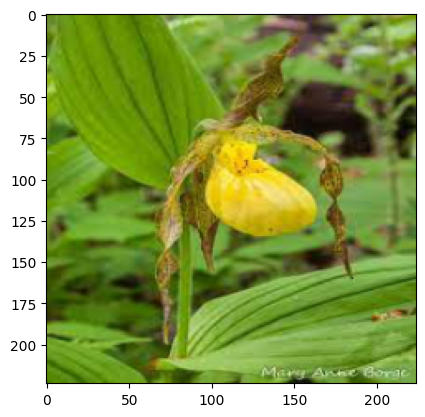

In [32]:
X = plt.imread('./dataset/yellow_lady_slipper.jpg')
print(type(X))
print(X.shape)
# plt.imshow(X)

X = transform(X).reshape(1, 3, 224, 224)
print(type(X))
print(X.shape)
plt.imshow(X[0].permute(1, 2, 0))

In [62]:
with torch.no_grad():
    vgg19_model.eval()

    pred_y = vgg19_model(X).sort(descending=True)
    pred_y_percentage = torch.nn.functional.softmax(pred_y[0], dim=1) * 100
    
print(pred_y[1][0, :5])
print(pred_y_percentage[0, :5])

for idx in range(5):
    print(f'{index_to_label[int(pred_y[1][0, idx])]} : {pred_y_percentage[0, idx]}%')

tensor([986, 669, 325, 998, 987])
tensor([80.3404, 13.0360,  1.5042,  0.9883,  0.3247])
yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum : 80.34039306640625%
mosquito net : 13.036001205444336%
sulphur butterfly, sulfur butterfly : 1.50419020652771%
ear, spike, capitulum : 0.988336443901062%
corn : 0.3247408866882324%
